In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns

## Testing Decision Tree Models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [30]:
#import the train data with the cleaned and engineered features we finalized in checkpoint 2
df_train = pd.read_csv('final_train_cleaned.csv')

In order to fit decision trees, all of our variables must be numeric. We will use sklearn's label encoding method to convert all of the newly generated categorical variables into numerically labeled values. 

In [ ]:
# All the columns included in the full dataframe, excluding ID and IDHOGAR values 
all_columns = [# 'Id',
                 'v2a1', 
                 'hacdor', 
                 'rooms', 
                 'hacapo', 
                 'v14a',  
                 'v18q1',
                 'r4h1', 
                 'r4h2',
                 'r4h3',
                 'r4m1',
                 'r4m2',
                 'r4m3',
                 'r4t1',
                 'r4t2',
                 'r4t3',
                 'tamhog',
                 'tamviv',
                 'escolari',
                 'rez_esc',
                 'hhsize',
                 'wall_material',  #new feature
                 'floor_material', #new feature
                 'roof_material', #new feature
                 'marital_status',#new feature
                 'rubbish_disposal', #new feature
                 'pisonotiene', 
                 'cielorazo',
                 'water_provision', #new feature
                 'abastaguano', 
                 'noelec',
                 'sanitario1', 
                 'electricity_source', #new feature
                 'wall_status',#new feature
                 'roof_status', #new feature
                 'floor_status',#new feature
                 'dis', 
                 'male', #gender indicator, =1 male, =0 female
                 'estadocivil1', 
                 'estadocivil2',
                 #'idhogar',
                 'hogar_nin',
                 'hogar_adul',
                 'hogar_mayor',
                 'hogar_total',
                 'dependency',
                 'edjefe',
                 'edjefa',
                 'meaneduc',
                 'instlevel1',
                 'instlevel8',
                 'bedrooms',
                 'overcrowding',
                 'asset_owned', #new feature
                 'qmobilephone',
                 'region',#new feature
                 'area1', #urban or rural area indicator, =1 urban
                 'age',
                 'SQBescolari',
                 'SQBage',
                 'SQBhogar_total',
                 'SQBedjefe',
                 'SQBhogar_nin',
                 'SQBovercrowding',
                 'SQBdependency',
                 'SQBmeaned',
                 'agesq',
                 'mean_per_capita_income', # new feature
                 'yrs_edu_lost', # new feature      
                 'mobilephone_per_capita', # new feature
                 'computer_per_capita', # new feature
                 'tablet_per_capita', # new feature
                 'Target'
                 ]

In [ ]:
full_df = df_train.loc[:, all_columns]

In [ ]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in all categorical columns
categorical_columns = ['region', 'wall_material', 'floor_material', 'roof_material', \
                 'marital_status', 'rubbish_disposal', 'water_provision', 'electricity_source', 'wall_status', \
                 'roof_status', 'floor_status']
for column in categorical_columns:
    full_df[column]= label_encoder.fit_transform(full_df[column])

Starting with the most basic decision tree, we experiment with different specifications in order to create models which are more generalizable to our test data (thus reducing overfitting and acheiving better predictions). We use feature selection, random forest modeling, and SMOTE in various combinations to test which of these methods/operations will be included in our final model. 

We create decision tree models and evaluate their results in the following order:
1. basic decision tree (all columns)
2. basic decision tree (only select non-engineered features) 
3. basic decision tree (feature selection) 
4.
5.


### 1. Basic decision tree (all features) 
We start with the basic decision tree model using all features from the dataset: full

In [33]:
y_target_df, X_df  = full_df[['Target']], full_df.drop(['Target'], axis=1)
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
        X_df, y_target_df, test_size=0.2, random_state=123)

x_valid_full,x_test_full,y_valid_full, y_test_full=train_test_split(x_test_full,y_test_full,test_size=0.5,random_state=123)


full_tree = tree.DecisionTreeClassifier()
full_tree = full_tree.fit(x_train_full, y_train_full)

y_pred_full = full_tree.predict(x_valid_full)

Here are the performance results:

In [34]:
accuracy = accuracy_score(y_valid_full, y_pred_full)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_full, y_pred_full))
full = classification_report(y_valid_full, y_pred_full, output_dict=True)

Accuracy: 0.797979797979798
Classification Report:
              precision    recall  f1-score   support

         1.0       0.48      0.50      0.49        20
         2.0       0.74      0.57      0.64        46
         3.0       0.63      0.76      0.69        34
         4.0       0.88      0.89      0.88       197

    accuracy                           0.80       297
   macro avg       0.68      0.68      0.68       297
weighted avg       0.80      0.80      0.80       297



### 2. Basic decision tree (only selecting on non-engineered features) 
We'll remove the engineered features to see if this makes a difference.

In [35]:
no_engineering = [# 'Id',
                 'v2a1', 
                 'hacdor', 
                 'rooms', 
                 'hacapo', 
                 'v14a',  
                 'v18q1',
                 'r4h1', 
                 'r4h2',
                 'r4h3',
                 'r4m1',
                 'r4m2',
                 'r4m3',
                 'r4t1',
                 'r4t2',
                 'r4t3',
                 'tamhog',
                 'tamviv',
                 'escolari',
                 'rez_esc',
                 'hhsize',
                #  'wall_material',  #new feature
                #  'floor_material', #new feature
                #  'roof_material', #new feature
                #  'marital_status',#new feature
                #  'rubbish_disposal', #new feature
                 'pisonotiene', 
                 'cielorazo',
                #  'water_provision', #new feature
                 'abastaguano', 
                 'noelec',
                 'sanitario1', 
                #  'electricity_source', #new feature
                #  'wall_status',#new feature
                #  'roof_status', #new feature
                #  'floor_status',#new feature
                 'dis', 
                 'male', #gender indicator, =1 male, =0 female
                 'estadocivil1', 
                 'estadocivil2',
                 #'idhogar',
                 'hogar_nin',
                 'hogar_adul',
                 'hogar_mayor',
                 'hogar_total',
                 'dependency',
                 'edjefe',
                 'edjefa',
                 'meaneduc',
                 'instlevel1',
                 'instlevel8',
                 'bedrooms',
                 'overcrowding',
                #  'asset_owned', #new feature
                 'qmobilephone',
                #  'region',#new feature
                 'area1', #urban or rural area indicator, =1 urban
                 'age',
                 'SQBescolari',
                 'SQBage',
                 'SQBhogar_total',
                 'SQBedjefe',
                 'SQBhogar_nin',
                 'SQBovercrowding',
                 'SQBdependency',
                 'SQBmeaned',
                 'agesq',
                #  'mean_per_capita_income', # new feature
                #  'yrs_edu_lost', # new feature      
                #  'mobilephone_per_capita', # new feature
                #  'computer_per_capita', # new feature
                #  'tablet_per_capita', # new feature
                 'Target'
                 ]

In [36]:
#make the tree with non-engineered features to compare
no_eng = full_df.loc[:, no_engineering]

y_target_compare, X_df_compare  = no_eng[['Target']], no_eng.drop(['Target'], axis=1)
x_train_compare, x_test_compare, y_train_compare, y_test_compare = train_test_split(
        X_df_compare, y_target_compare, test_size=0.2, random_state=123)

x_valid_compare,x_test_compare,y_valid_compare, y_test_compare=train_test_split(x_test_compare,y_test_compare,test_size=0.5,random_state=123)


compare_tree = tree.DecisionTreeClassifier()
compare_tree = compare_tree.fit(x_train_compare, y_train_compare)

y_pred_compare = compare_tree.predict(x_valid_compare)

Here are the performance results:

In [37]:
#show performance
accuracy = accuracy_score(y_valid_compare, y_pred_compare)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_compare, y_pred_compare))
compare = classification_report(y_valid_compare, y_pred_compare)

Accuracy: 0.7373737373737373
Classification Report:
              precision    recall  f1-score   support

         1.0       0.32      0.40      0.36        20
         2.0       0.64      0.46      0.53        46
         3.0       0.46      0.56      0.51        34
         4.0       0.86      0.87      0.87       197

    accuracy                           0.74       297
   macro avg       0.57      0.57      0.56       297
weighted avg       0.75      0.74      0.74       297



So, we can see that including our engineered features contributes to better accuracies. This is a good indication for the work we did in Checkpoint 2. We will continue to include our engineered features moving forward. 

### 3. Basic decision tree using SMOTE data (all features) 
Now we perform SMOTE on the full dataset and create a decision tree using the all features from the SMOTE dataset: full_smote

In [44]:
#perform SMOTE on the full dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_df, y_target_df)

In [45]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(
       X_resampled, y_resampled, test_size=0.2, random_state=123)

x_valid_smote,x_test_smote,y_valid_smote, y_test_smote=train_test_split(x_test_smote,y_test_smote,test_size=0.5,random_state=123)


smote_tree = tree.DecisionTreeClassifier()
smote_tree = smote_tree.fit(x_train_smote, y_train_smote)

y_pred_smote = smote_tree.predict(x_valid_smote)

Here are the performance results:

In [46]:
accuracy = accuracy_score(y_valid_smote, y_pred_smote)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_smote, y_pred_smote))
smote_full = classification_report(y_valid_smote, y_pred_smote, output_dict=True)


Accuracy: 0.9168797953964194
Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       195
         2.0       0.92      0.89      0.90       188
         3.0       0.94      0.94      0.94       208
         4.0       0.89      0.88      0.88       191

    accuracy                           0.92       782
   macro avg       0.92      0.92      0.92       782
weighted avg       0.92      0.92      0.92       782



### 4. Random forest tree using SMOTE data (all features) 
Next, we run random forest on all features from the SMOTE dataset: full_smote_rf

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier2_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=100, oob_score=True)
classifier2_rf.fit(x_train_smote, y_train_smote)
classifier2_rf.oob_score_

/var/folders/4b/3cdcp3h14kl45v92kx9_styr0000gn/T/ipykernel_15670/72552449.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2_rf.fit(x_train_smote, y_train_smote)


0.9192258477287268

In [48]:
rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10,15,20,25],
    'min_samples_leaf': [50,100,200, 250],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search2 = GridSearchCV(estimator=rf_smote,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search2.fit(x_train_smote, y_train_smote)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataCon

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [50, 100, 200, 250],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
rf_smote_best = grid_search2.best_estimator_
y_pred_rf_smote = rf_smote_best.predict(x_valid_smote)

Here are the performance results:

In [50]:
accuracy = accuracy_score(y_valid_smote, y_pred_rf_smote)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_smote, y_pred_rf_smote))
full_smote_rf = classification_report(y_valid_smote, y_pred_rf_smote, output_dict=True)

Accuracy: 0.7301790281329923
Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.86      0.75       195
         2.0       0.72      0.61      0.66       188
         3.0       0.73      0.65      0.69       208
         4.0       0.82      0.81      0.82       191

    accuracy                           0.73       782
   macro avg       0.74      0.73      0.73       782
weighted avg       0.73      0.73      0.73       782



##### Let's see the most important features used in the random forest tree on SMOTE data

In [51]:
rf_smote_best.feature_importances_

imp_df2 = pd.DataFrame({
    "Varname": x_train_smote.columns,
    "Imp": rf_smote_best.feature_importances_
})
imp_df2.sort_values(by="Imp", ascending=False)[:20]

,Varname,Imp
0,v2a1,0.272651
65,mean_per_capita_income,0.078098
26,cielorazo,0.050776
62,SQBdependency,0.044172
43,dependency,0.036457
17,escolari,0.036401
56,SQBescolari,0.035331
51,asset_owned,0.033242
46,meaneduc,0.026174
63,SQBmeaned,0.023393


#### We also want to check which features from the full df have at least +/- 15% correlation with the target

In [52]:
correlation_matrix = full_df.corr()
target_correlations = correlation_matrix['Target'].sort_values(ascending=False)

/var/folders/4b/3cdcp3h14kl45v92kx9_styr0000gn/T/ipykernel_15670/1130823853.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = full_df.corr()


In [53]:
# See which columns have positive correlations ~15% and higher
target_correlations[1:16]

v2a1                      0.349605
escolari                  0.333791
meaneduc                  0.333593
SQBescolari               0.314397
cielorazo                 0.295249
asset_owned               0.287570
SQBmeaned                 0.276190
SQBedjefe                 0.241272
instlevel8                0.235102
mean_per_capita_income    0.215767
tablet_per_capita         0.214161
rooms                     0.201019
v18q1                     0.197493
qmobilephone              0.168685
computer_per_capita       0.159212
Name: Target, dtype: float64

In [54]:
# See which columns have negative correlations ~15% and higher
target_correlations[58:]

yrs_edu_lost      -0.170611
r4h1              -0.186530
r4m1              -0.209479
SQBovercrowding   -0.219318
overcrowding      -0.234954
wall_material     -0.256747
SQBhogar_nin      -0.256824
r4t1              -0.260917
hogar_nin         -0.266309
estadocivil1            NaN
Name: Target, dtype: float64

### 5. Basic decision tree (selected features) 
We choose to select on features which share moderate to high correlations (at least 15%) with the Target variable, and are not co-dependent. 
We create a basic decision tree model using only these selected features: select

In [56]:
selected_columns = [
                 'v2a1',
                'rooms', 
                'v18q1',
                'r4h1', 
                'r4m1',
                'r4t1',
                'escolari',
                'wall_material',
                'cielorazo',
                'hogar_nin',
                 'meaneduc',
                 'instlevel8',
                'overcrowding',
                 'asset_owned', 
                 'qmobilephone',
                 'SQBescolari',
                 'SQBedjefe',
                 'SQBhogar_nin',
                 'SQBovercrowding',
                 'SQBmeaned',
                 'mean_per_capita_income', 
                 'yrs_edu_lost',
                 'computer_per_capita', 
                 'tablet_per_capita', 
                 'Target'
                 ]

In [57]:
selected_df = full_df.loc[:, selected_columns]

In [58]:
y_target_select, X_select  = selected_df[['Target']], selected_df.drop(['Target'], axis=1)
x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(
        X_select, y_target_select, test_size=0.2, random_state=123)

x_valid_select,x_test_select,y_valid_select, y_test_select=train_test_split(x_test_select,y_test_select,test_size=0.5,random_state=123)


select_tree = tree.DecisionTreeClassifier()
select_tree = select_tree.fit(x_train_select, y_train_select)

y_pred_select = select_tree.predict(x_valid_select)

Here are the performance results:

In [59]:
accuracy = accuracy_score(y_valid_select, y_pred_select)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_select, y_pred_select))
select = classification_report(y_valid_select, y_pred_select, output_dict=True)

Accuracy: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

         1.0       0.43      0.50      0.47        20
         2.0       0.58      0.48      0.52        46
         3.0       0.46      0.53      0.49        34
         4.0       0.86      0.86      0.86       197

    accuracy                           0.74       297
   macro avg       0.58      0.59      0.59       297
weighted avg       0.74      0.74      0.74       297



### 6. Random forest tree (selected features) 
Next, we run random forest on only selected features: select_rf

In [60]:
classifier3_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=100, oob_score=True)
classifier3_rf.fit(x_train_select, y_train_select)
classifier3_rf.oob_score_

/var/folders/4b/3cdcp3h14kl45v92kx9_styr0000gn/T/ipykernel_15670/3649484940.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier3_rf.fit(x_train_select, y_train_select)


0.7544154751892347

In [61]:
rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10,15,20,25],
    'min_samples_leaf': [50,100,200, 250],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search3 = GridSearchCV(estimator=rf2,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search3.fit(x_train_select, y_train_select)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataCon

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [50, 100, 200, 250],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [62]:
rf_best2 = grid_search3.best_estimator_
y_pred_rf2 = rf_best2.predict(x_valid_select)

Here are the performance results:

In [63]:
accuracy = accuracy_score(y_valid_select, y_pred_rf2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_select, y_pred_rf2))
rf_select = classification_report(y_valid_select, y_pred_rf2)

Accuracy: 0.7239057239057239
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        20
         2.0       0.43      0.33      0.37        46
         3.0       0.90      0.26      0.41        34
         4.0       0.76      0.97      0.85       197

    accuracy                           0.72       297
   macro avg       0.52      0.39      0.41       297
weighted avg       0.67      0.72      0.67       297



/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarah/anaconda3/lib/p

In [64]:
#show most important features used in this random forest model
rf_best2.feature_importances_

imp_df3 = pd.DataFrame({
    "Varname": x_train_select.columns,
    "Imp": rf_best2.feature_importances_
})
imp_df3.sort_values(by="Imp", ascending=False)[:20]

,Varname,Imp
0,v2a1,0.486661
19,SQBmeaned,0.094549
20,mean_per_capita_income,0.063499
10,meaneduc,0.052853
8,cielorazo,0.049851
11,instlevel8,0.033883
2,v18q1,0.028999
9,hogar_nin,0.025992
17,SQBhogar_nin,0.025127
18,SQBovercrowding,0.022647


This model (select_rf) is not good so we will not consider using it.

### 7. Basic decision tree using SMOTE data (selected features) 
Now, let's run SMOTE on our selected columns, and fit a decision tree: select_smote

In [65]:
smote = SMOTE()
X_resampled2, y_resampled2 = smote.fit_resample(X_select, y_target_select)

In [66]:
x_train_smote2, x_test_smote2, y_train_smote2, y_test_smote2 = train_test_split(
       X_resampled2, y_resampled2, test_size=0.2, random_state=123)

x_valid_smote2,x_test_smote2,y_valid_smote2, y_test_smote2=train_test_split(x_test_smote2,y_test_smote2,test_size=0.5,random_state=123)


smote_tree2 = tree.DecisionTreeClassifier()
smote_tree2 = smote_tree2.fit(x_train_smote2, y_train_smote2)

y_pred_smote2 = smote_tree2.predict(x_valid_smote2)

Here are the performance results:

In [67]:
accuracy = accuracy_score(y_valid_smote2, y_pred_smote2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_smote2, y_pred_smote2))
select_smote = classification_report(y_valid_smote2, y_pred_smote2, output_dict=True)

Accuracy: 0.8554987212276215
Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.91      0.89       195
         2.0       0.82      0.82      0.82       188
         3.0       0.85      0.86      0.86       208
         4.0       0.88      0.83      0.85       191

    accuracy                           0.86       782
   macro avg       0.86      0.85      0.85       782
weighted avg       0.86      0.86      0.86       782



### 8. Random forest tree using SMOTE data (selected features) 
Next, we will build the random forest model only on selected features from the SMOTE dataset: select_smote_rf

In [68]:
classifier4_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=100, oob_score=True)
classifier4_rf.fit(x_train_smote2, y_train_smote2)
classifier4_rf.oob_score_

/var/folders/4b/3cdcp3h14kl45v92kx9_styr0000gn/T/ipykernel_15670/2321157287.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier4_rf.fit(x_train_smote2, y_train_smote2)


0.9072296865003199

In [69]:
rf_smote2 = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10,15,20,25],
    'min_samples_leaf': [50,100,200, 250],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search4 = GridSearchCV(estimator=rf_smote2,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search4.fit(x_train_smote2, y_train_smote2)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sarah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataCon

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [50, 100, 200, 250],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [70]:
rf_smote_best2 = grid_search4.best_estimator_
y_pred_rf_smote2 = rf_smote_best2.predict(x_valid_smote2)

Here are the performance results:

In [71]:
accuracy = accuracy_score(y_valid_smote2, y_pred_rf_smote2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid_smote2, y_pred_rf_smote2))
select_smote_rf = classification_report(y_valid_smote2, y_pred_rf_smote2, output_dict=True)

Accuracy: 0.7237851662404092
Classification Report:
              precision    recall  f1-score   support

         1.0       0.65      0.87      0.74       195
         2.0       0.68      0.65      0.66       188
         3.0       0.78      0.61      0.68       208
         4.0       0.82      0.78      0.80       191

    accuracy                           0.72       782
   macro avg       0.73      0.73      0.72       782
weighted avg       0.73      0.72      0.72       782



In [72]:
rf_smote_best2.feature_importances_

imp_df4 = pd.DataFrame({
    "Varname": x_train_smote2.columns,
    "Imp": rf_smote_best2.feature_importances_
})
imp_df4.sort_values(by="Imp", ascending=False)[:20]

,Varname,Imp
0,v2a1,0.383960
20,mean_per_capita_income,0.120920
15,SQBescolari,0.056373
8,cielorazo,0.054642
6,escolari,0.047147
13,asset_owned,0.042108
16,SQBedjefe,0.040993
10,meaneduc,0.037159
19,SQBmeaned,0.030105
18,SQBovercrowding,0.022601


# Selecting the Final Model

Based on our results, we can narrow down the models we choose to consider in our final selection. We compare and evaluate models 1 (full), 5 (select), 7 (select_smote), and 8 (select_smote_rf).

We can create graphs to help compare the performance of the four models. When evaluating performance statistics, we want our recall to be close to 1, but are okay with precision less than 1 in order to protect vulnerable populations (precision allows false positives, whereas recall allows false negatives).

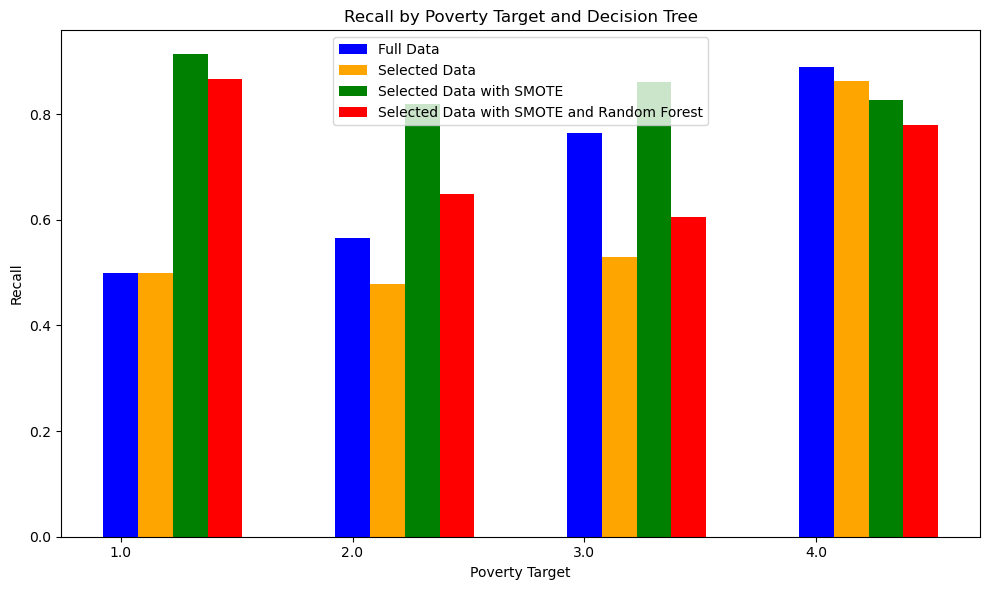

In [79]:
#Creating recall by Poverty Target and Model plot 
#Combine the classification reports into a list
accuracies = [full, select, select_smote, select_smote_rf]

#Initialize an empty DataFrame to store the combined report data
combined_data = []


for classification in accuracies:
    if classification == full:
        model_name = "Full Data"
    elif classification == select:
        model_name = "Selected Data"
    elif classification == select_smote:
        model_name = "Selected Data with SMOTE"
    elif classification == select_smote_rf:
        model_name = "Selected Data with SMOTE and Random Forest"
    
    for class_label in ['1.0', '2.0', '3.0', '4.0']:
        row = [class_label, model_name, classification[class_label]["recall"]]
        combined_data.append(row)

#Creating a DataFrame from the combined report data
df = pd.DataFrame(combined_data, columns=['Poverty Target', 'Decision Tree', 'Recall'])


grouped_data = df.groupby(['Poverty Target', 'Decision Tree']).mean().reset_index()

#Defining the x-axis positions for each model
x = np.arange(len(grouped_data['Poverty Target'].unique()))

#Defining the colors for each model
colors = ['blue', 'orange', 'green', 'red']

#Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(grouped_data['Decision Tree'].unique()):
    model_data = grouped_data[grouped_data['Decision Tree'] == model]
    ax.bar(x + i * 0.15, model_data['Recall'], width=0.15, label=model, color=colors[i])

#Setting the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Poverty Target'].unique())
ax.set_xlabel('Poverty Target')
ax.set_ylabel('Recall')
ax.set_title('Recall by Poverty Target and Decision Tree')
ax.legend()

plt.tight_layout()
plt.show()

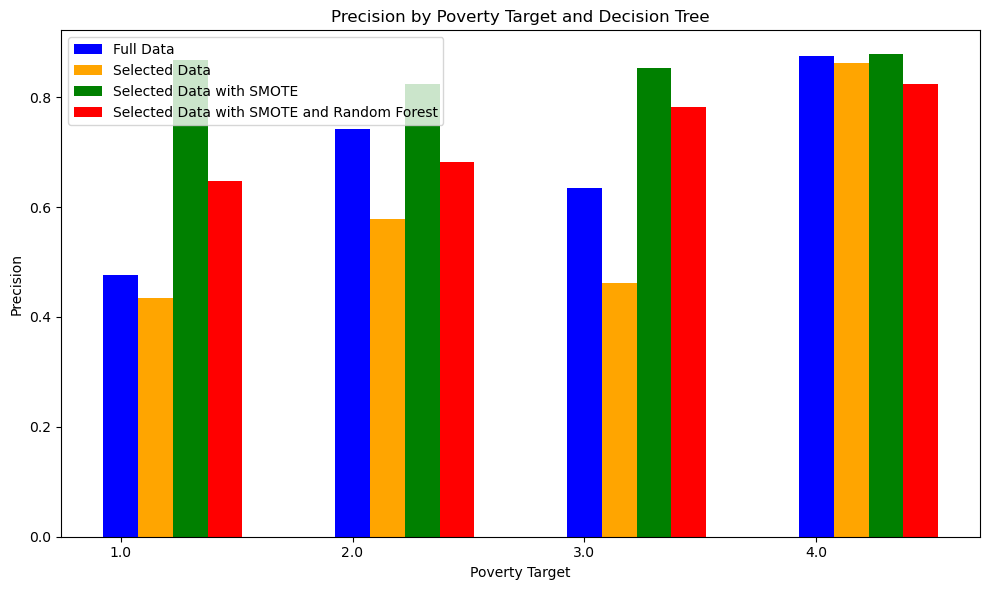

In [80]:
#Creating precision by Poverty Target and Model plot 
#Combine the classification reports into a list
accuracies = [full, select, select_smote, select_smote_rf]

#Initialize an empty DataFrame to store the combined report data
combined_data = []


for classification in accuracies:
    if classification == full:
        model_name = "Full Data"
    elif classification == select:
        model_name = "Selected Data"
    elif classification == select_smote:
        model_name = "Selected Data with SMOTE"
    elif classification == select_smote_rf:
        model_name = "Selected Data with SMOTE and Random Forest"
    
    for class_label in ['1.0', '2.0', '3.0', '4.0']:
        row = [class_label, model_name, classification[class_label]["precision"]]
        combined_data.append(row)

#Creating a DataFrame from the combined report data
df = pd.DataFrame(combined_data, columns=['Poverty Target', 'Decision Tree', 'Precision'])


grouped_data = df.groupby(['Poverty Target', 'Decision Tree']).mean().reset_index()

#Defining the x-axis positions for each model
x = np.arange(len(grouped_data['Poverty Target'].unique()))

#Defining the colors for each model
colors = ['blue', 'orange', 'green', 'red']

#Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(grouped_data['Decision Tree'].unique()):
    model_data = grouped_data[grouped_data['Decision Tree'] == model]
    ax.bar(x + i * 0.15, model_data['Precision'], width=0.15, label=model, color=colors[i])

#Setting the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Poverty Target'].unique())
ax.set_xlabel('Poverty Target')
ax.set_ylabel('Precision')
ax.set_title('Precision by Poverty Target and Decision Tree')
ax.legend()

plt.tight_layout()
plt.show()

We see that our Selected Data with SMOTE (select_smote) model performed the best across all classes, although we worry about overfitting to the training data. For this reason, we choose the Selected Data with SMOTE and Random Forest (select_smote_rf) model to be our final model. Even though it performs slightly worse than the regular decision tree, we know that random forest helps prevent overfitting, and will allow our final model to be more generalizable to our test data. 

# Visualize Our Tree

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))
plot_tree(rf_smote_best2.estimators_[0], feature_names = X_resampled2.columns, class_names=['1.0', '2.0', '3.0', '4.0'],filled=True)

# Run Our Final Model on the Test Data
Pick select_smote_rf as final model, and run on test data to see results of our final predictions. 

In [192]:
#import test data from appropriate path to test on original provided dataset

fianl_y_pred = rf_smote_best2.predict(x_test_smote2)

accuracy = accuracy_score(y_test_smote2, fianl_y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_smote2, fianl_y_pred))
select_smote_rf = classification_report(y_test_smote2, fianl_y_pred, output_dict=True)

Accuracy: 0.7378516624040921
Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.87      0.76       208
         2.0       0.71      0.62      0.66       202
         3.0       0.82      0.63      0.72       183
         4.0       0.79      0.83      0.81       189

    accuracy                           0.74       782
   macro avg       0.75      0.74      0.74       782
weighted avg       0.75      0.74      0.73       782

